In [2]:
from vit_pipeline.utils import make_container_dict
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import os
import pickle

load_dotenv()

allen_cache_path = os.environ.get('HGMS_ALLEN_CACHE_PATH')
boc = BrainObservatoryCache(manifest_file=str(Path(allen_cache_path) / Path('brain_observatory_manifest.json')))

experiment_containers = make_container_dict(boc)

In [3]:
experiment_containers

{511498742: {'three_session_A': 511534603,
  'three_session_B': 511434920,
  'three_session_C': 511242327},
 511499656: {'three_session_A': 511440894,
  'three_session_B': 510938357,
  'three_session_C': 510656082},
 511500480: {'three_session_A': 510390912,
  'three_session_B': 511458599,
  'three_session_C': 510524416},
 511507650: {'three_session_A': 502115959,
  'three_session_B': 501794235,
  'three_session_C': 500855614},
 511507811: {'three_session_A': 501021421,
  'three_session_B': 500860585,
  'three_session_C': 497060401},
 511509529: {'three_session_A': 501271265,
  'three_session_B': 500964514,
  'three_session_C': 501337989},
 511510627: {'three_session_A': 501929610,
  'three_session_B': 503538804,
  'three_session_C': 501879034},
 511510640: {'three_session_A': 502793808,
  'three_session_B': 502526200,
  'three_session_C': 502352946},
 511510645: {'three_session_A': 502666254,
  'three_session_B': 504508104,
  'three_session_C': 503864409},
 511510650: {'three_session_

In [11]:
session_A=experiment_containers[643061996]['three_session_A']
data_set_events= boc.get_ophys_experiment_events()

data_set_events


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.20308098, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.19031029, 0.        ,
        0.        ]])

In [15]:
data_set_regression = boc.get_ophys_experiment_data(session_A)
stim_table = data_set_regression.get_stimulus_table('natural_movie_one')

2024-12-23 03:13:16,828 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/644426715


In [16]:
transformer_embedding_path = Path("/home/maria/Documents/HuggingMouseData/TransformerEmbeddings/openai_clip-vit-base-patch32_embeddings.pkl") 
        # Load the transformer embeddings
with open(transformer_embedding_path, 'rb') as file:
    transfr = pickle.load(file)
embedding = transfr['natural_movie_one']  # Shape: (total_time_points, embedding_dim)
embedding_dim = embedding.shape[1]

In [22]:
first_trial=stim_table[0:900]
Tfirst_trial

,frame,start,end,repeat
0,0,38680,38680,0
1,1,38681,38681,0
2,2,38682,38682,0
3,3,38683,38683,0
4,4,38684,38684,0
...,...,...,...,...
895,895,39578,39578,0
896,896,39579,39579,0
897,897,39580,39580,0
898,898,39581,39581,0


In [26]:
all_cells=data_set_events[:,first_trial['start']]
all_cells.shape


(292, 900)

In [27]:
import random
random.seed(42)
cell_idx = random.sample(range(all_cells.shape[0]), 1)

In [28]:
my_trial=all_cells[cell_idx,:]

In [30]:
my_trial.shape
embedding.shape

(900, 768)

In [33]:
v=my_trial.T
X=embedding

filtered=v.T@X

array([[-1.76312924e-02,  2.06801064e-01,  1.07940060e-01,
         1.17987362e-01,  1.32323953e-01, -3.69108130e-02,
         2.17940482e-02,  6.12471259e-02, -1.52489108e-01,
         4.44422501e-02, -5.47139334e-02, -4.09839421e-02,
        -1.12843781e-01, -8.81124324e-03,  1.36113876e-01,
         2.15271644e-01,  1.48028654e-01,  1.79063026e-02,
        -2.43116591e-02,  4.12741638e-02, -4.75361707e-02,
        -4.37210541e-02,  9.64953965e-02,  1.39411681e-01,
        -1.50900419e-02,  1.99446838e-02,  9.67048369e-02,
         8.18223603e-02, -1.09254281e-03,  1.02871164e-01,
        -3.71587843e-01,  5.12396069e-02,  1.11433357e-02,
        -4.65343221e-02,  6.28722090e-02,  1.49476200e-01,
         1.16438785e-01,  1.01228735e-01,  8.77431248e-02,
        -1.30970727e-01, -5.95763598e-02,  4.83307851e-02,
         1.31544698e-01,  1.07920765e-01,  1.04750431e-01,
         8.39996262e-02, -4.38036412e-03, -1.36128581e-02,
         9.82793985e-02, -4.82904192e-02,  8.86693341e-0

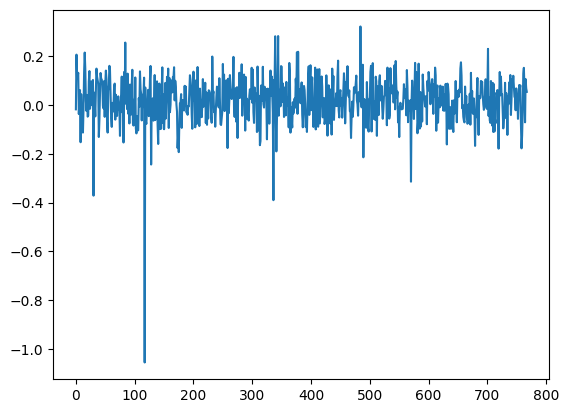

In [36]:
plt.plot(filtered.T)

In [37]:
v=all_cells.T
X=embedding

filtered=v.T@X

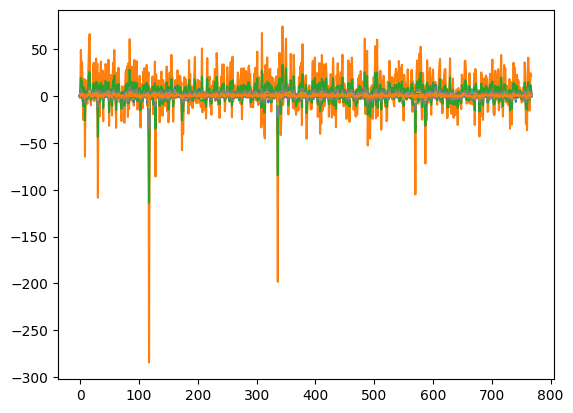

In [38]:
plt.plot(filtered.T)

In [39]:
filtered.shape

(292, 768)

In [43]:
import numpy as np
np.cov(filtered)

array([[0.00395405, 0.00486685, 0.00938096, ..., 0.02132923, 0.01042486,
        0.03769703],
       [0.00486685, 0.01279155, 0.0193936 , ..., 0.04174725, 0.02288436,
        0.09359685],
       [0.00938096, 0.0193936 , 0.04017533, ..., 0.07766273, 0.04207805,
        0.16511981],
       ...,
       [0.02132923, 0.04174725, 0.07766273, ..., 0.18371115, 0.08890435,
        0.36459108],
       [0.01042486, 0.02288436, 0.04207805, ..., 0.08890435, 0.05334427,
        0.19042677],
       [0.03769703, 0.09359685, 0.16511981, ..., 0.36459108, 0.19042677,
        0.90099728]])

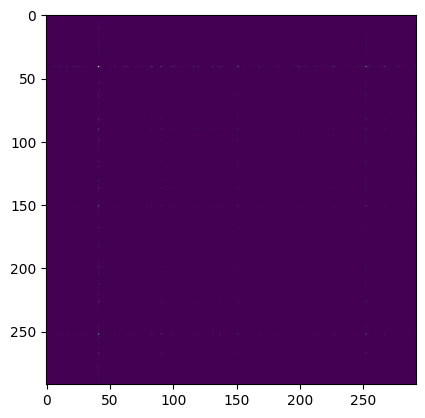

In [44]:
plt.imshow(np.cov(filtered))